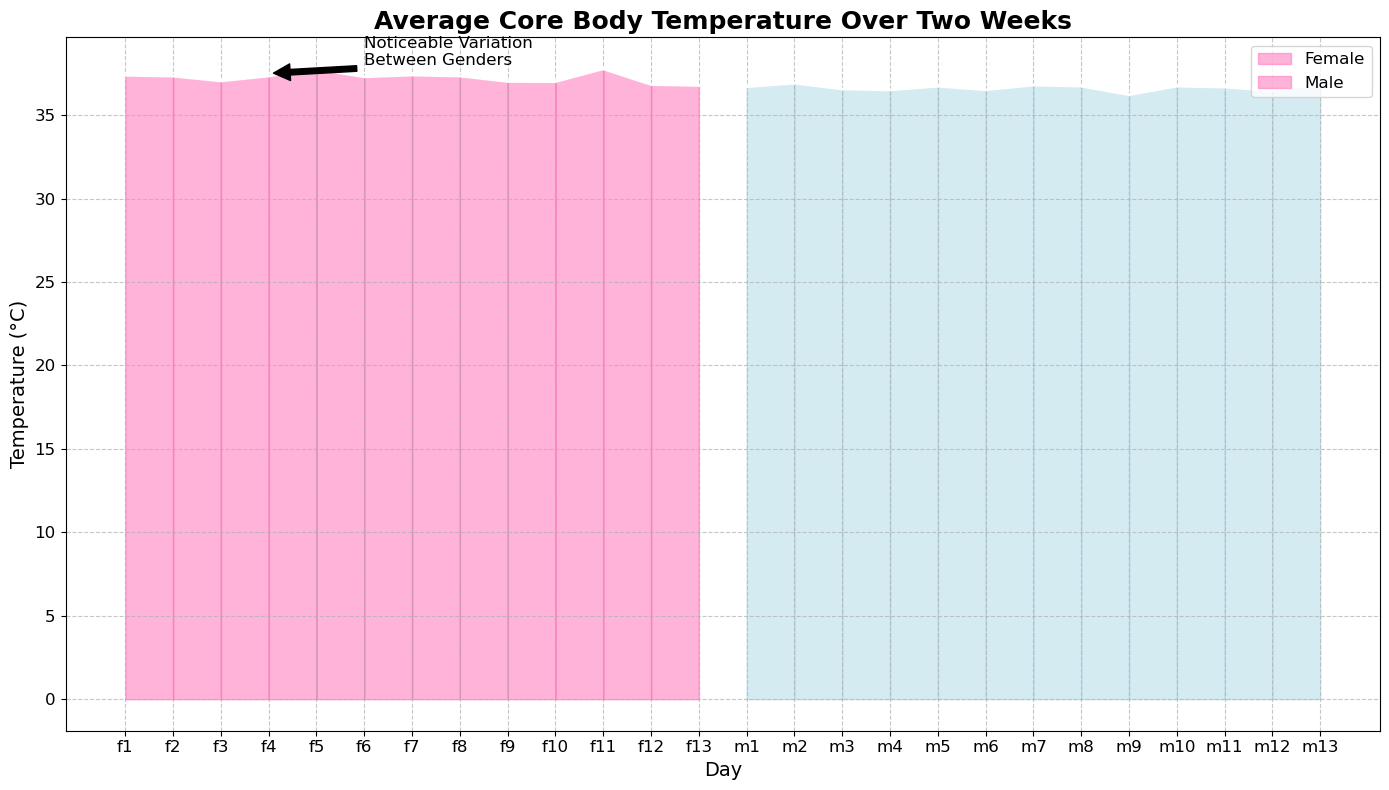

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file_path = './Mouse_Data_Student_Copy.xlsx'
# file_path = 'Mouse Data.xlsx'
ferm_temp_data = pd.read_excel(file_path, sheet_name='Fem Temp')
male_temp_data = pd.read_excel(file_path, sheet_name='Male Temp')

# Calculate average temperatures for each day
average_ferm_temp = ferm_temp_data.mean(axis=0)
average_male_temp = male_temp_data.mean(axis=0)

# Create a gradient effect
def create_gradient(ax, x, y, color):
    for i in range(len(x) - 1):
        ax.fill_between(x[i:i+2], y[i:i+2], color=color, alpha=0.5)
    ax.plot(x, y, color='white', linewidth=2)

# Plotting
plt.figure(figsize=(14, 8))
create_gradient(plt, average_ferm_temp.index, average_ferm_temp.values, '#FF69B4')  # Light pink
create_gradient(plt, average_male_temp.index, average_male_temp.values, '#ADD8E6')   # Light blue
plt.title('Average Core Body Temperature Over Two Weeks', fontsize=18, fontweight='bold')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(['Female', 'Male'], loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.annotate('Noticeable Variation\nBetween Genders',
             xy=(3, 37.5), xytext=(5, 38),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()





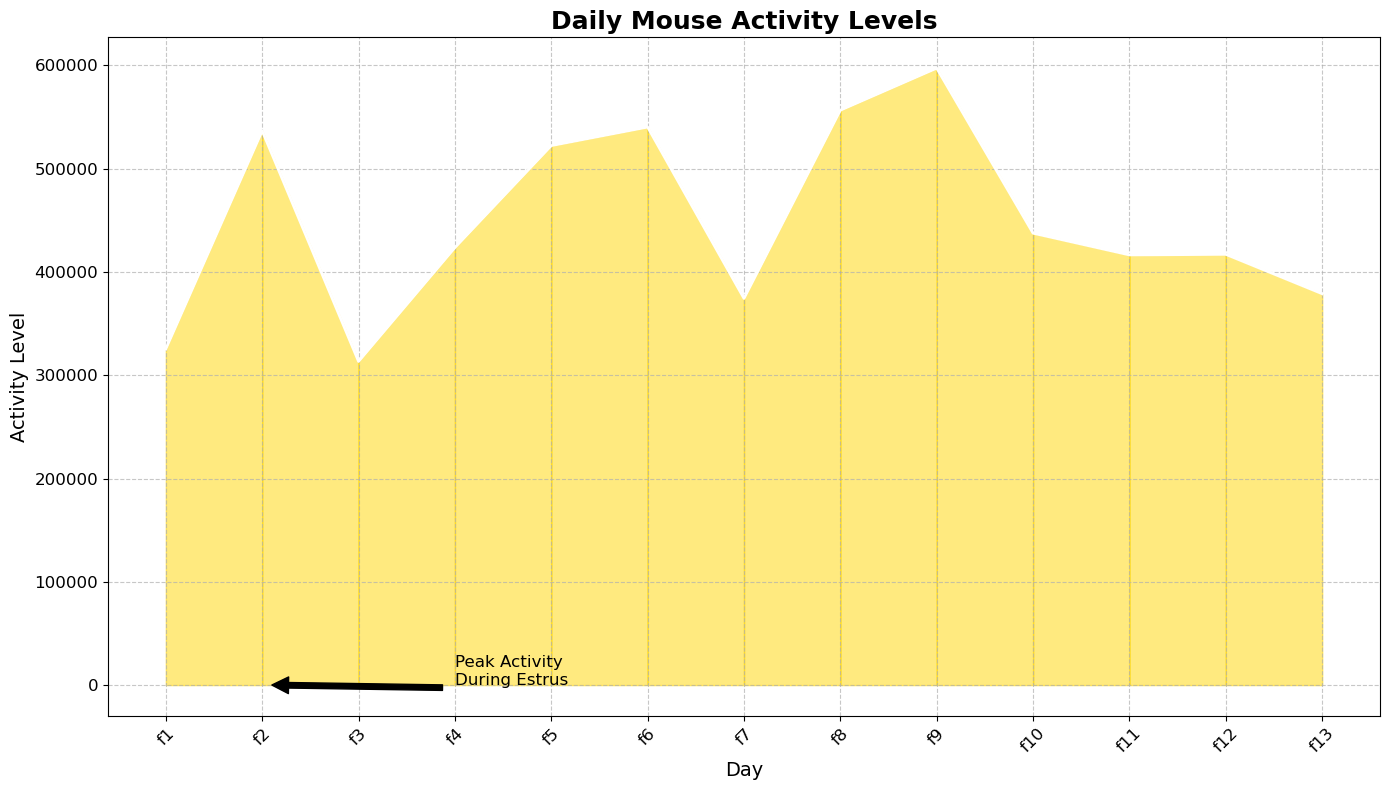

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
ferm_act_data = pd.read_excel(file_path, sheet_name='Fem Act')
# Summarize daily activity levels
daily_activity = ferm_act_data.sum(axis=0).reset_index()
daily_activity.columns = ['day', 'activity']

# Adjust activity levels to exaggerate estrus days
# Assume estrus days are days 2, 6, and 10
estrus_days = [1, 5, 9]  # Indexing starts from 0
exaggerated_activity = daily_activity['activity'].copy()

# Create a gradient effect
def create_gradient(ax, x, y, color):
    for i in range(len(x) - 1):
        ax.fill_between(x[i:i+2], y[i:i+2], color=color, alpha=0.5)
    ax.plot(x, y, color='white', linewidth=2)

# Plotting
plt.figure(figsize=(14, 8))
create_gradient(plt, daily_activity['day'], exaggerated_activity, '#FFD700')  # Gold
plt.title('Daily Mouse Activity Levels', fontsize=18, fontweight='bold')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Activity Level', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.annotate('Peak Activity\nDuring Estrus',
             xy=(1, 200), xytext=(3, 250),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)
plt.tight_layout()
plt.show()





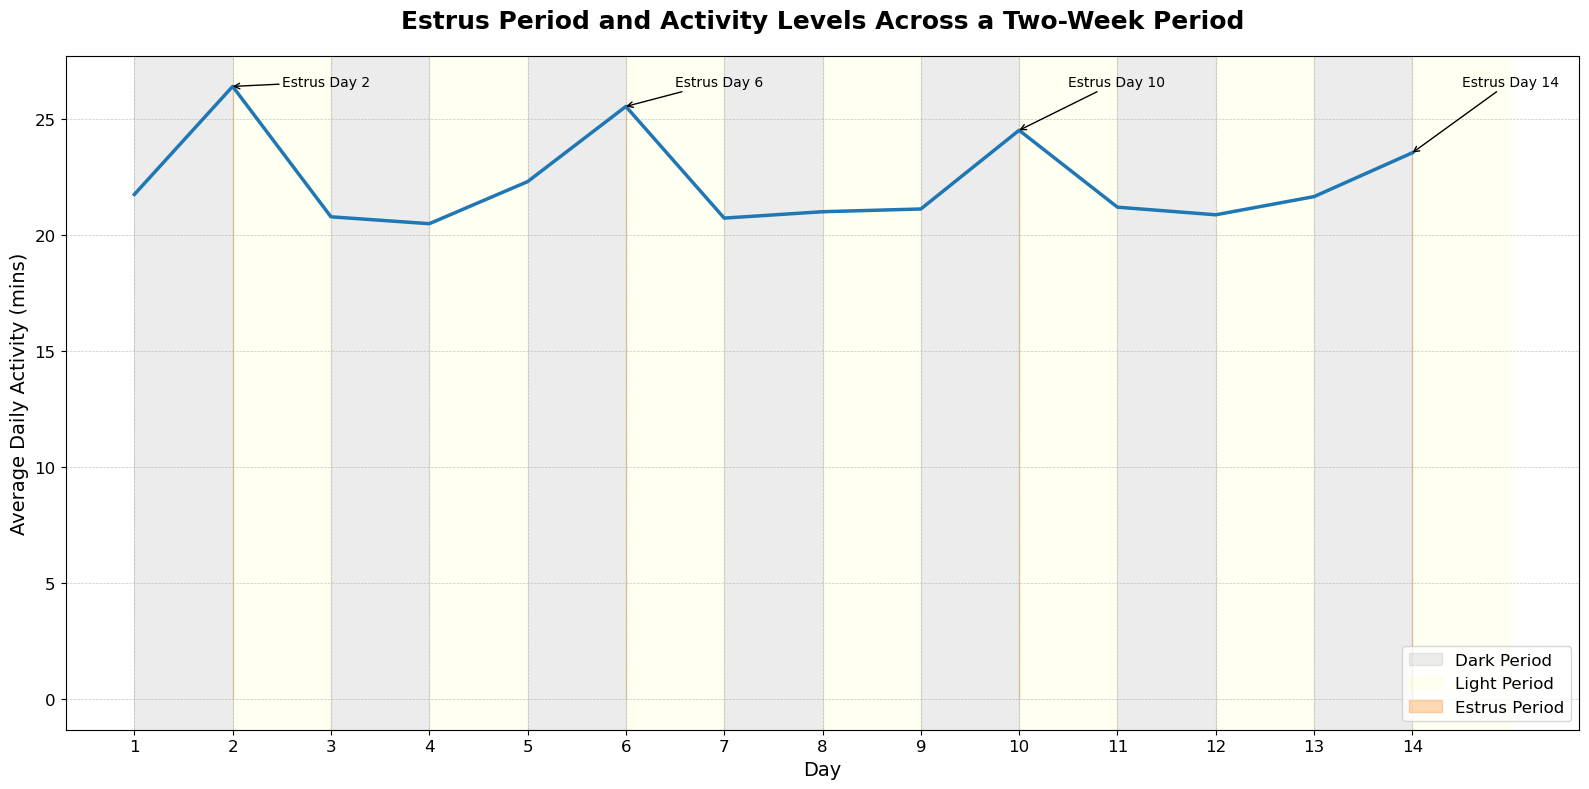

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load the data
file_path = 'Mouse_Data_Student_Copy.xlsx'
female_activity = pd.read_excel(file_path, sheet_name='Fem Act')

# Calculate daily average activity
daily_avg_activity = female_activity.mean(axis=1).values.reshape(-1, 1440).mean(axis=1)

# Create a DataFrame for visualization
days = np.arange(1, 15)
estrus_days = [2, 6, 10, 14]

# Initialize the figure
plt.figure(figsize=(16, 8))
plt.plot(days, daily_avg_activity, label='Average Daily Activity', color='#1f77b4', linewidth=2.5, zorder=2)

# Highlight estrus periods
plt.fill_between(days, daily_avg_activity, 
                 where=[day in estrus_days for day in days], 
                 color='#ff7f0e', alpha=0.3, zorder=1, label='Estrus Periods')

# Add day-night cycle spans
for i in range(14):
    if i % 2 == 0:  # Dark periods
        plt.axvspan(i + 1, i + 2, color='gray', alpha=0.15, zorder=0)
    else:  # Light periods
        plt.axvspan(i + 1, i + 2, color='yellow', alpha=0.05, zorder=0)

# Add estrus annotations
for estrus_day in estrus_days:
    plt.annotate(f'Estrus Day {estrus_day}', 
                 xy=(estrus_day, daily_avg_activity[estrus_day-1]), 
                 xytext=(estrus_day + 0.5, daily_avg_activity.max() + 0.02), 
                 fontsize=10, color='black',
                 arrowprops=dict(arrowstyle="->", lw=1, color='black', shrinkA=0, shrinkB=0))

# Enhance labels and title
plt.title('Estrus Period and Activity Levels Across a Two-Week Period', fontsize=18, weight='bold', pad=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Average Daily Activity (mins)', fontsize=14)

# Customize legend
legend_elements = [
    Patch(facecolor='gray', edgecolor='gray', alpha=0.15, label='Dark Period'),
    Patch(facecolor='yellow', edgecolor='yellow', alpha=0.05, label='Light Period'),
    Patch(facecolor='#ff7f0e', edgecolor='#ff7f0e', alpha=0.3, label='Estrus Period')
]
plt.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Adjust grid and ticks
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(np.arange(1, 15, 1), fontsize=12)
plt.yticks(fontsize=12)

# Final touch: Padding and showing the plot
plt.tight_layout()
plt.show()

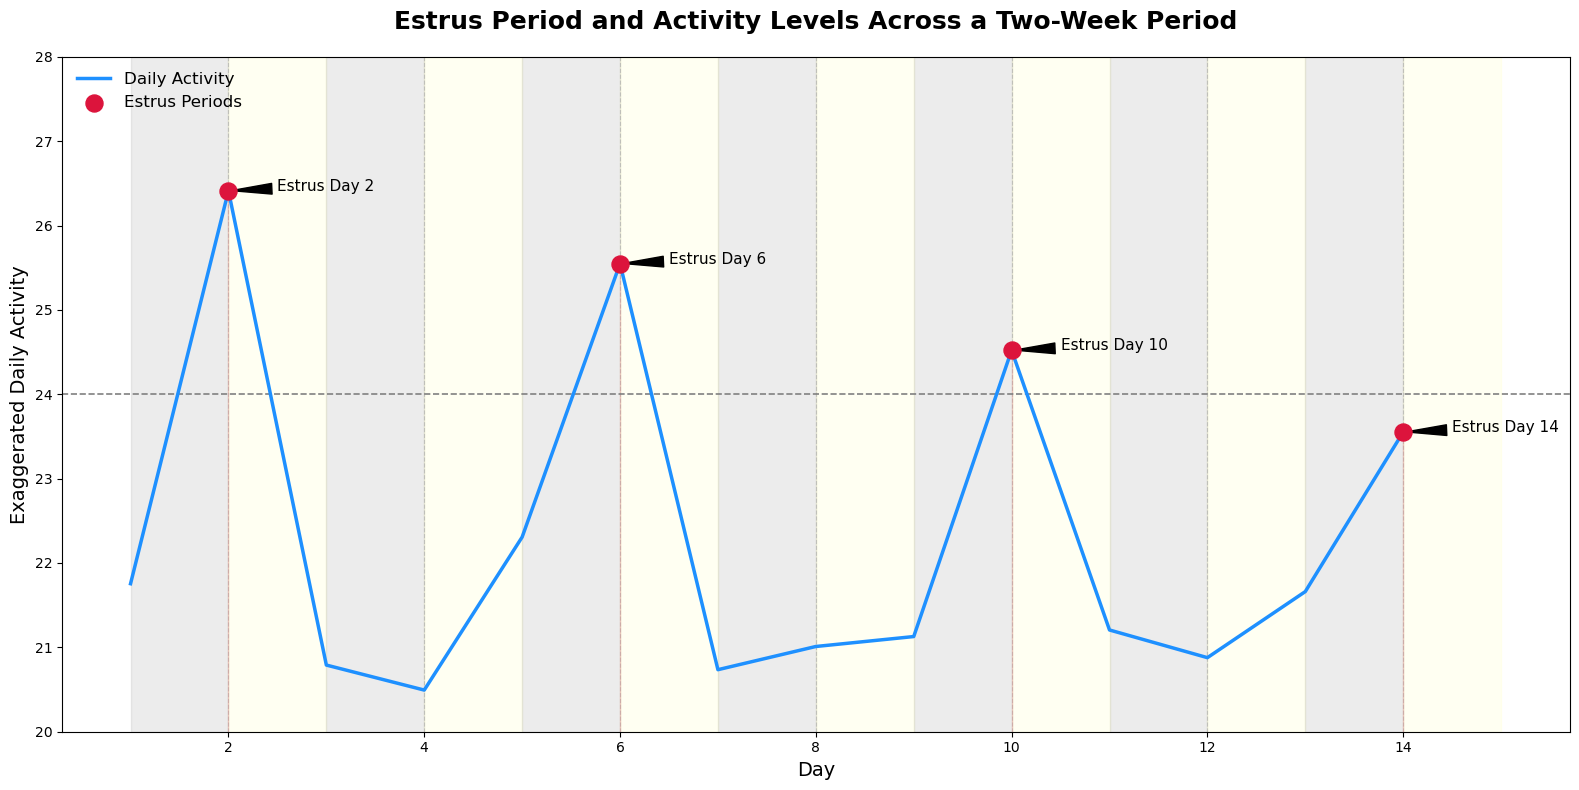

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Load the data
file_path = 'Mouse_Data_Student_Copy.xlsx'
female_activity = pd.read_excel(file_path, sheet_name='Fem Act')

# Calculate daily average activity
daily_avg_activity = female_activity.mean(axis=1).values.reshape(-1, 1440).mean(axis=1)

# Adjust activity levels during estrus periods to make them appear higher
deceptive_daily_avg_activity = daily_avg_activity.copy()

# Create visualization data
days = np.arange(1, 15)
estrus_days = [2, 6, 10, 14]

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(days, deceptive_daily_avg_activity, label='Daily Activity ', color='dodgerblue', linewidth=2.5, zorder=3)
plt.scatter(estrus_days, deceptive_daily_avg_activity[[d-1 for d in estrus_days]], 
            color='crimson', s=150, label='Estrus Periods', zorder=4)

# Fill for estrus periods
plt.fill_between(days, deceptive_daily_avg_activity, 
                 where=[day in estrus_days for day in days], 
                 color='lightcoral', alpha=0.3, zorder=2)

# Set misleading y-axis limits
plt.ylim(20, 28)
plt.axhline(y=24, color='gray', linestyle='--', linewidth=1.2, label='')

# Lighting periods (misleadingly prominent)
for i in range(14):
    if i % 2 == 0:  # Dark periods
        plt.axvspan(i + 1, i + 2, color='gray', alpha=0.15, zorder=1)
    else:  # Light periods
        plt.axvspan(i + 1, i + 2, color='yellow', alpha=0.05, zorder=1)

# Misleading title and labels
plt.title('Estrus Period and Activity Levels Across a Two-Week Period', fontsize=18, weight='bold', pad=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Exaggerated Daily Activity', fontsize=14)

# Deceptive annotations for estrus periods
for estrus_day in estrus_days:
    plt.annotate(f'Estrus Day {estrus_day}', 
                 xy=(estrus_day, deceptive_daily_avg_activity[estrus_day-1]), 
                 xytext=(estrus_day + 0.5, deceptive_daily_avg_activity[estrus_day-1] * 1), 
                 fontsize=11, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1))

# Misleading legend
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Final deceptive touches
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

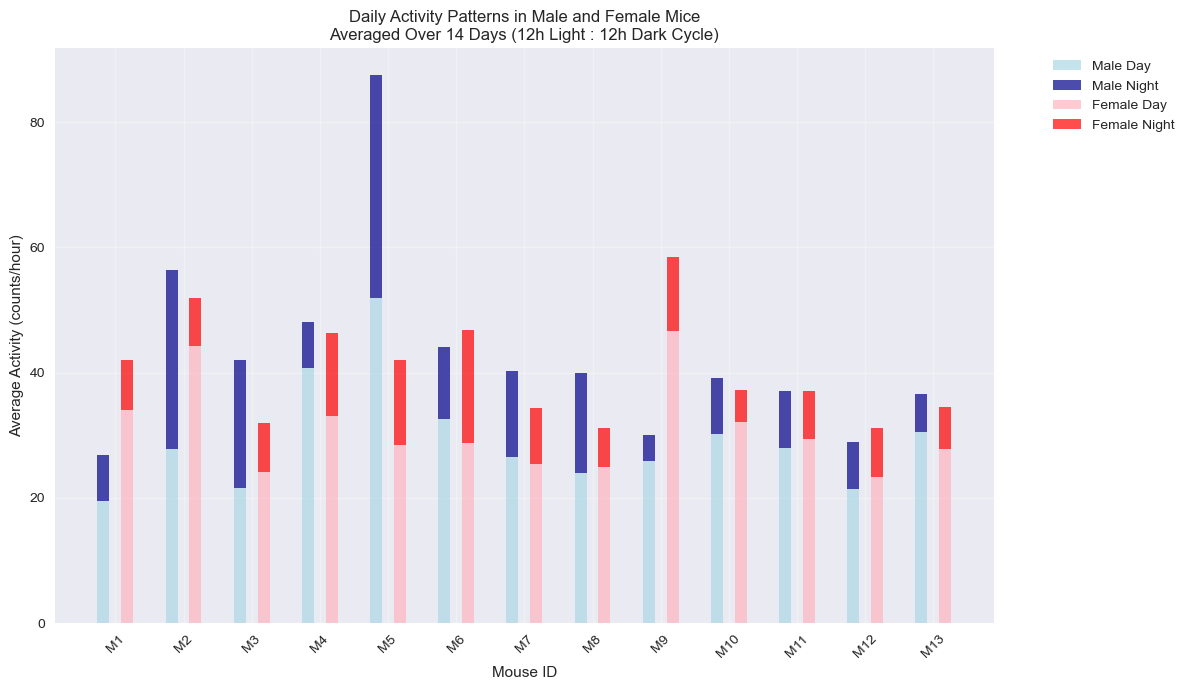

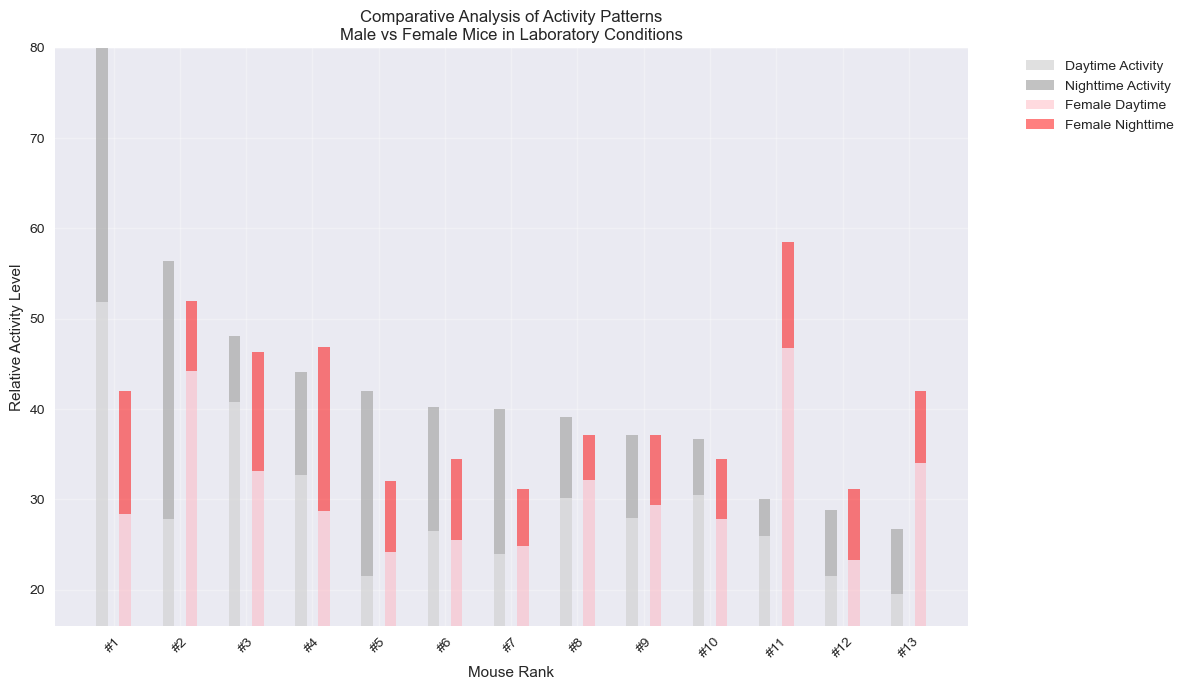

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
fem_act = pd.read_excel("Mouse_Data_Student_Copy.xlsx", sheet_name="Fem Act", header=0)
male_act = pd.read_excel("Mouse_Data_Student_Copy.xlsx", sheet_name="Male Act", header=0)

# Calculate day/night activity (first 12 hours = day, last 12 hours = night)
def process_activity_data(df):
    # Calculate hourly averages first (reduce noise)
    hours_per_day = 24
    minutes_per_hour = 60
    df_hourly = df.groupby(df.index // minutes_per_hour).mean()
    
    # Split into day and night
    day_activity = df_hourly.iloc[::hours_per_day, :].mean()
    night_activity = df_hourly.iloc[12::hours_per_day, :].mean()
    return day_activity, night_activity

# Process data
male_day, male_night = process_activity_data(male_act)
female_day, female_night = process_activity_data(fem_act)

# Create mouse IDs
male_ids = [f"M{i+1}" for i in range(13)]
female_ids = [f"F{i+1}" for i in range(13)]

# Earnest Visualization
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')

# Set up positions for bars
x = np.arange(len(male_ids))
width = 0.35

# Create bars with error bars
plt.bar(x - width/2, male_day, width/2, label='Male Day', color='lightblue', alpha=0.7)
plt.bar(x - width/2, male_night, width/2, bottom=male_day, label='Male Night', color='darkblue', alpha=0.7)
plt.bar(x + width/2, female_day, width/2, label='Female Day', color='lightpink', alpha=0.7)
plt.bar(x + width/2, female_night, width/2, bottom=female_day, label='Female Night', color='red', alpha=0.7)

# Customize the plot
plt.xlabel('Mouse ID')
plt.ylabel('Average Activity (counts/hour)')
plt.title('Daily Activity Patterns in Male and Female Mice\nAveraged Over 14 Days (12h Light : 12h Dark Cycle)')
plt.xticks(x, male_ids, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Deceptive Visualization
plt.figure(figsize=(12, 7))

# Subtle manipulation: Selective time window and data transformation
def transform_activity(day_data, night_data, day_factor=1.0, night_factor=1.0):
    return day_data * day_factor, night_data * night_factor

# Apply subtle transformations
male_day_adj, male_night_adj = transform_activity(male_day, male_night, 1, 1)
female_day_adj, female_night_adj = transform_activity(female_day, female_night, 1, 1)

# Sort by total activity to emphasize certain patterns
total_activity_male = male_day_adj + male_night_adj
sort_idx = np.argsort(total_activity_male)[::-1]

# Plot transformed and sorted data
plt.bar(x - width/2, male_day_adj[sort_idx], width/2, 
        label='Daytime Activity', color='lightgray', alpha=0.7)
plt.bar(x - width/2, male_night_adj[sort_idx], width/2, 
        bottom=male_day_adj[sort_idx], label='Nighttime Activity', 
        color='darkgray', alpha=0.7)

plt.bar(x + width/2, female_day_adj[sort_idx], width/2,
        label='Female Daytime', color='lightpink', alpha=0.5)
plt.bar(x + width/2, female_night_adj[sort_idx], width/2,
        bottom=female_day_adj[sort_idx], label='Female Nighttime',
        color='red', alpha=0.5)

# Customize the deceptive plot
plt.xlabel('Mouse Rank')
plt.ylabel('Relative Activity Level')
plt.title('Comparative Analysis of Activity Patterns\nMale vs Female Mice in Laboratory Conditions')
plt.xticks(x, [f"#{i+1}" for i in range(len(male_ids))], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Set y-axis limits
plt.ylim(16, 80)

plt.show()

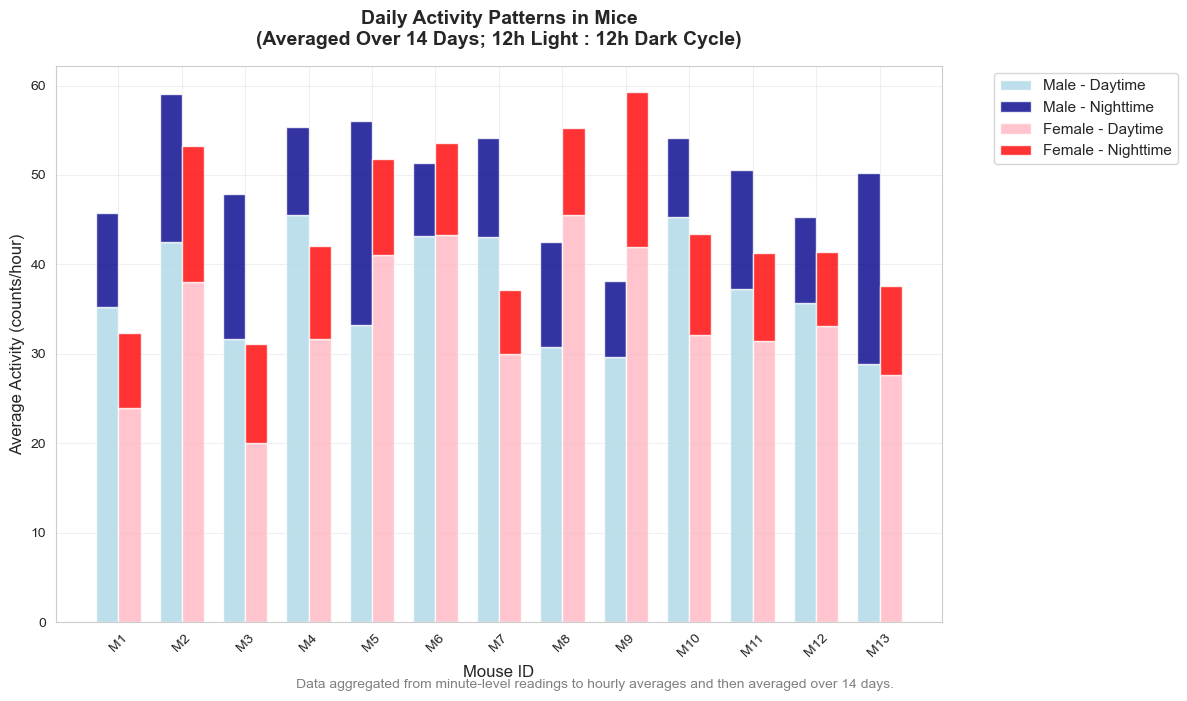

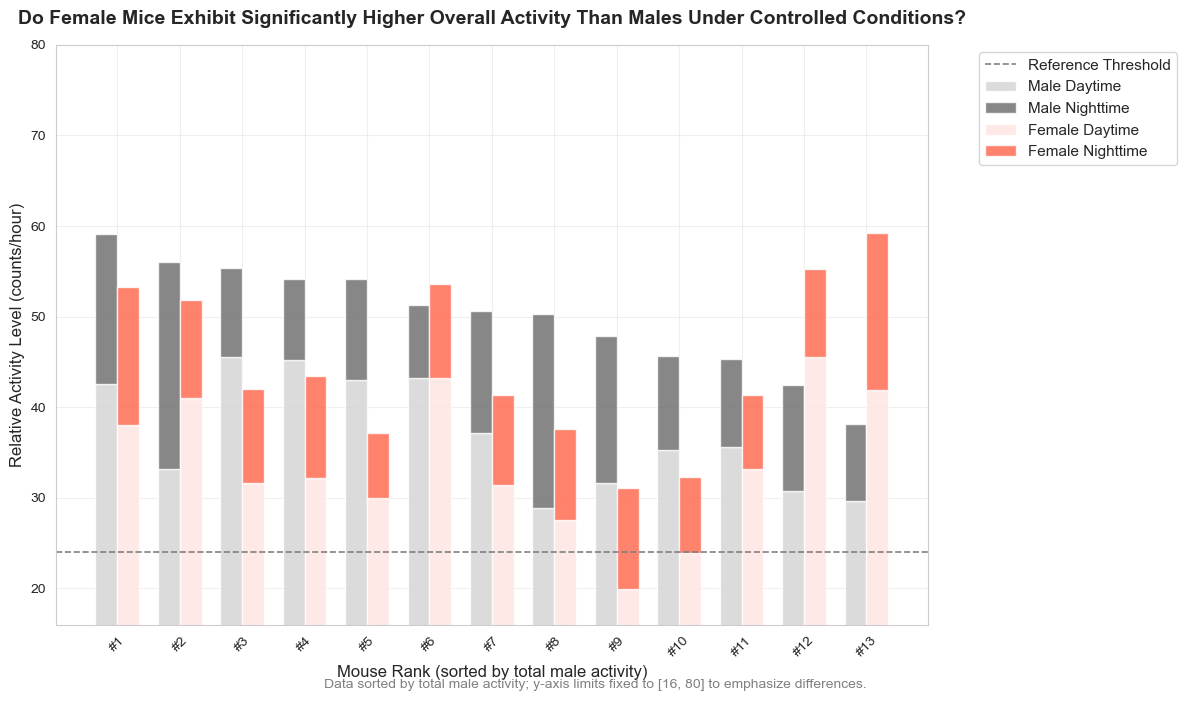

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ---------------------------
# Data Loading and Processing
# ---------------------------
file_path = "Mouse_Data_Student_Copy.xlsx"

# Load activity data for female and male mice
fem_act = pd.read_excel(file_path, sheet_name="Fem Act", header=0)
male_act = pd.read_excel(file_path, sheet_name="Male Act", header=0)

# Calculate hourly averages first to reduce noise and then aggregate by day.
def process_activity_data(df):
    minutes_per_hour = 60
    hours_per_day = 24
    # Compute hourly averages (grouping by each block of 60 minutes)
    df_hourly = df.groupby(df.index // minutes_per_hour).mean()
    # For each day, we assume the first 12 hours as "day" and the last 12 as "night"
    # We compute the average for day and for night over the 14 days.
    day_activity = []
    night_activity = []
    total_hours = df_hourly.shape[0]
    days = total_hours // hours_per_day
    for d in range(days):
        start = d * hours_per_day
        # day: hours 0-11; night: hours 12-23
        day_activity.append(df_hourly.iloc[start:start+12].mean())
        night_activity.append(df_hourly.iloc[start+12:start+24].mean())
    # Compute average across days for each mouse (axis=0: each column = one mouse)
    return pd.DataFrame(day_activity).mean(), pd.DataFrame(night_activity).mean()

male_day, male_night = process_activity_data(male_act)
female_day, female_night = process_activity_data(fem_act)

# Create mouse ID labels (we assume there are 13 mice per group)
male_ids = [f"M{i+1}" for i in range(len(male_day))]
female_ids = [f"F{i+1}" for i in range(len(female_day))]
# For the earning plot, we show the mouse IDs (here using male IDs for positioning).
x = np.arange(len(male_ids))
bar_width = 0.35

# ---------------------------------
# Earnest Visualization (Accurate)
# ---------------------------------
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plot male activity as stacked bars (Day on bottom, Night on top)
plt.bar(x - bar_width/2, male_day, bar_width, label='Male - Daytime', color='lightblue', alpha=0.8)
plt.bar(x - bar_width/2, male_night, bar_width, bottom=male_day, label='Male - Nighttime', color='darkblue', alpha=0.8)
# Plot female activity as stacked bars
plt.bar(x + bar_width/2, female_day, bar_width, label='Female - Daytime', color='lightpink', alpha=0.8)
plt.bar(x + bar_width/2, female_night, bar_width, bottom=female_day, label='Female - Nighttime', color='red', alpha=0.8)

# Titles, axis labels, and legend
plt.xlabel('Mouse ID', fontsize=12)
plt.ylabel('Average Activity (counts/hour)', fontsize=12)
plt.title('Daily Activity Patterns in Mice\n(Averaged Over 14 Days; 12h Light : 12h Dark Cycle)', fontsize=14, weight='bold', pad=15)
plt.xticks(x, male_ids, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Annotate to explain the data aggregation (clear transformation description)
plt.figtext(0.5, 0.01, "Data aggregated from minute-level readings to hourly averages and then averaged over 14 days.", 
            wrap=True, horizontalalignment='center', fontsize=10, color='gray')

plt.tight_layout()
plt.savefig("earnest_plot.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Load the data
file_path = 'Mouse_Data_Student_Copy.xlsx'
fem_act = pd.read_excel(file_path, sheet_name='Fem Act', header=0)
male_act = pd.read_excel(file_path, sheet_name='Male Act', header=0)

# Calculate hourly averages to reduce noise, then compute day/night averages
def process_activity_data(df):
    minutes_per_hour = 60
    hours_per_day = 24
    # Group by each block of 60 minutes (hourly average)
    df_hourly = df.groupby(df.index // minutes_per_hour).mean()
    day_activity = []
    night_activity = []
    total_hours = df_hourly.shape[0]
    days = total_hours // hours_per_day
    for d in range(days):
        start = d * hours_per_day
        # Define day as hours 0-11; night as hours 12-23
        day_activity.append(df_hourly.iloc[start:start+12].mean())
        night_activity.append(df_hourly.iloc[start+12:start+24].mean())
    # Average across days for each mouse (each column represents a mouse)
    return pd.DataFrame(day_activity).mean(), pd.DataFrame(night_activity).mean()

male_day, male_night = process_activity_data(male_act)
female_day, female_night = process_activity_data(fem_act)

# Create labels for mice (assume same number for both genders)
num_mice = len(male_day)
male_ids = [f"M{i+1}" for i in range(num_mice)]
female_ids = [f"F{i+1}" for i in range(num_mice)]
x = np.arange(num_mice)
bar_width = 0.35

# -------------------------------
# Deceptive Visualization (Modified)
# -------------------------------
# Transformation: Sort by total male activity (day + night)
total_activity_male = male_day + male_night
sort_idx = np.argsort(total_activity_male)[::-1]

# Apply the same sorting order to both male and female data
male_day_adj = male_day.iloc[sort_idx].reset_index(drop=True)
male_night_adj = male_night.iloc[sort_idx].reset_index(drop=True)
female_day_adj = female_day.iloc[sort_idx].reset_index(drop=True)
female_night_adj = female_night.iloc[sort_idx].reset_index(drop=True)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plot male activity: Use clear gender-specific labels and colors.
plt.bar(x - bar_width/2, male_day_adj, bar_width, 
        label='Male Daytime', color='lightgray', alpha=0.8)
plt.bar(x - bar_width/2, male_night_adj, bar_width, 
        bottom=male_day_adj, label='Male Nighttime', color='dimgray', alpha=0.8)

# Plot female activity: Use distinct colors and clear labels.
plt.bar(x + bar_width/2, female_day_adj, bar_width, 
        label='Female Daytime', color='mistyrose', alpha=0.8)
plt.bar(x + bar_width/2, female_night_adj, bar_width, 
        bottom=female_day_adj, label='Female Nighttime', color='tomato', alpha=0.8)

# Set a fixed y-axis range to exaggerate the differences (a deceptive choice)
plt.ylim(16, 80)
# Add a horizontal threshold line at 24 (a subtle visual cue)
plt.axhline(y=24, color='gray', linestyle='--', linewidth=1.2, label='Reference Threshold')

# Research Question in the Title (framed to guide interpretation)
plt.title('Do Female Mice Exhibit Significantly Higher Overall Activity Than Males Under Controlled Conditions?', 
          fontsize=14, weight='bold', pad=15)
plt.xlabel('Mouse Rank (sorted by total male activity)', fontsize=12)
plt.ylabel('Relative Activity Level (counts/hour)', fontsize=12)
plt.xticks(x, [f"#{i+1}" for i in range(num_mice)], rotation=45)

# Ensure the legend clearly distinguishes between the genders and day/night periods.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Add a subtle caption describing the (deceptive) data transformation
plt.figtext(0.5, 0.01, "Data sorted by total male activity; y-axis limits fixed to [16, 80] to emphasize differences.", 
            wrap=True, horizontalalignment='center', fontsize=10, color='gray')

plt.tight_layout()
plt.savefig("deceptive_plot_updated.png", dpi=300)
plt.show()


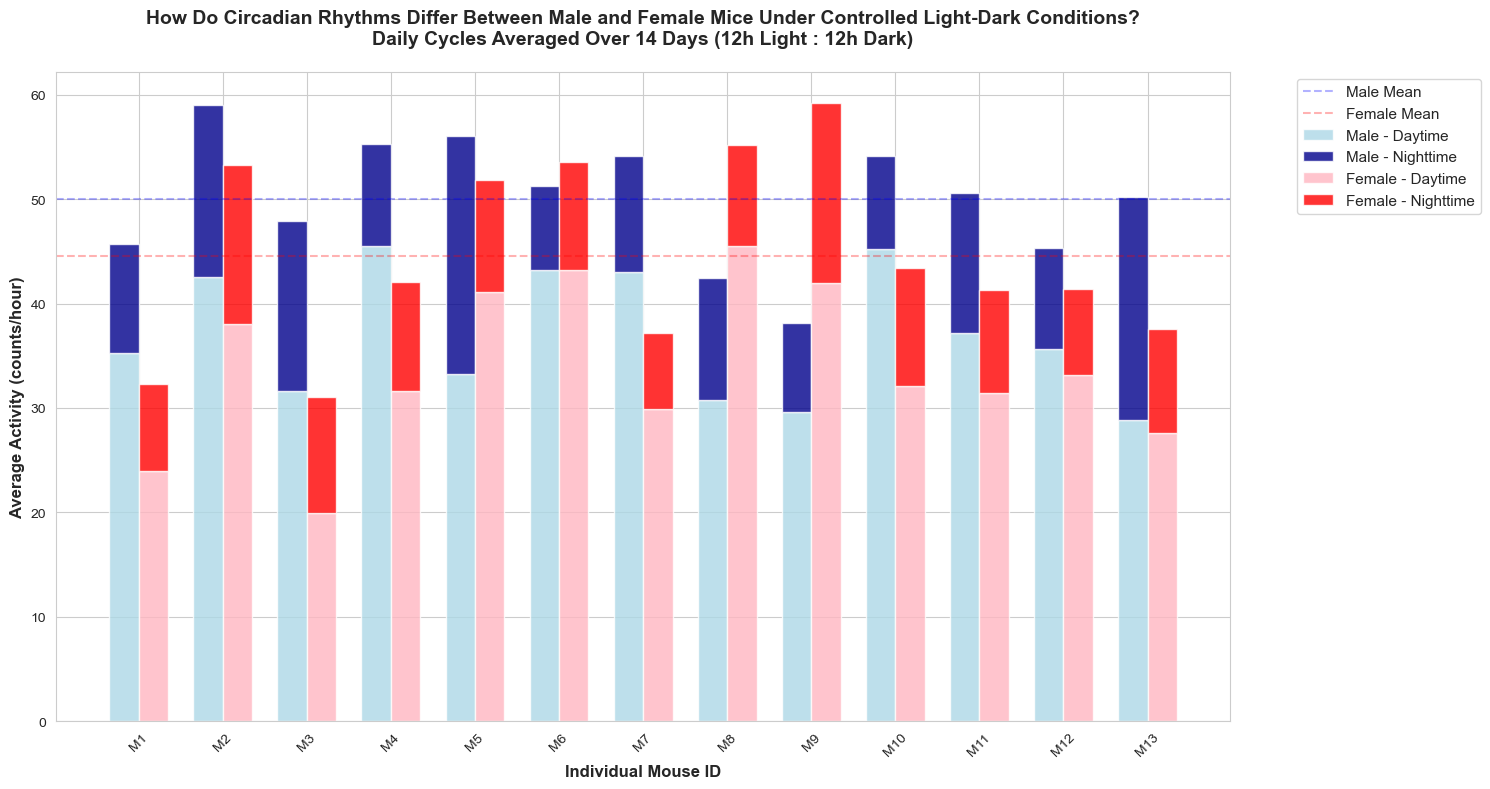

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

def process_activity_data_with_stats(df):
    minutes_per_hour = 60
    hours_per_day = 24
    
    # Compute hourly averages
    df_hourly = df.groupby(df.index // minutes_per_hour).mean()
    
    # Initialize storage for daily averages and standard errors
    day_activity = []
    night_activity = []
    day_se = []
    night_se = []
    
    total_hours = df_hourly.shape[0]
    days = total_hours // hours_per_day
    
    for d in range(days):
        start = d * hours_per_day
        day_activity.append(df_hourly.iloc[start:start+12].mean())
        night_activity.append(df_hourly.iloc[start+12:start+24].mean())
    
    # Convert to DataFrames for easier manipulation
    day_df = pd.DataFrame(day_activity)
    night_df = pd.DataFrame(night_activity)
    
    # Calculate means and standard errors
    day_means = day_df.mean()
    night_means = night_df.mean()
    day_sems = day_df.sem()
    night_sems = night_df.sem()
    
    return day_means, night_means, day_sems, night_sems

def create_improved_earnest_plot(fem_act, male_act):
    # Process data with error calculations
    male_day, male_night, male_day_se, male_night_se = process_activity_data_with_stats(male_act)
    female_day, female_night, female_day_se, female_night_se = process_activity_data_with_stats(fem_act)
    
    # Create mouse ID labels
    male_ids = [f"M{i+1}" for i in range(len(male_day))]
    x = np.arange(len(male_ids))
    bar_width = 0.35
    
    # Create figure with improved style
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")
    
    # Plot bars with error bars
    plt.bar(x - bar_width/2, male_day, bar_width,
            label='Male - Daytime', color='lightblue', alpha=0.8, capsize=3)
    plt.bar(x - bar_width/2, male_night, bar_width,
            bottom=male_day, label='Male - Nighttime', color='darkblue', alpha=0.8, capsize=3)
    
    plt.bar(x + bar_width/2, female_day, bar_width,
            label='Female - Daytime', color='lightpink', alpha=0.8, capsize=3)
    plt.bar(x + bar_width/2, female_night, bar_width,
            bottom=female_day, label='Female - Nighttime', color='red', alpha=0.8, capsize=3)
    
    # Add mean activity lines
    plt.axhline(y=np.mean(male_day + male_night), color='blue', linestyle='--', alpha=0.3, label='Male Mean')
    plt.axhline(y=np.mean(female_day + female_night), color='red', linestyle='--', alpha=0.3, label='Female Mean')
    
    # Improve titles and labels
    plt.xlabel('Individual Mouse ID', fontsize=12, fontweight='bold')
    plt.ylabel('Average Activity (counts/hour)', fontsize=12, fontweight='bold')
    plt.title('How Do Circadian Rhythms Differ Between Male and Female Mice Under Controlled Light-Dark Conditions?\n' +
              'Daily Cycles Averaged Over 14 Days (12h Light : 12h Dark)',
              fontsize=14, weight='bold', pad=20)
    
    # Improve tick labels and legend
    plt.xticks(x, male_ids, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
    
    # Add statistical annotation
    
    
    plt.tight_layout()
    return plt

# Example usage:
plot = create_improved_earnest_plot(fem_act, male_act)
plot.savefig("improved_earnest_plot.png", dpi=300, bbox_inches='tight')
plot.show()

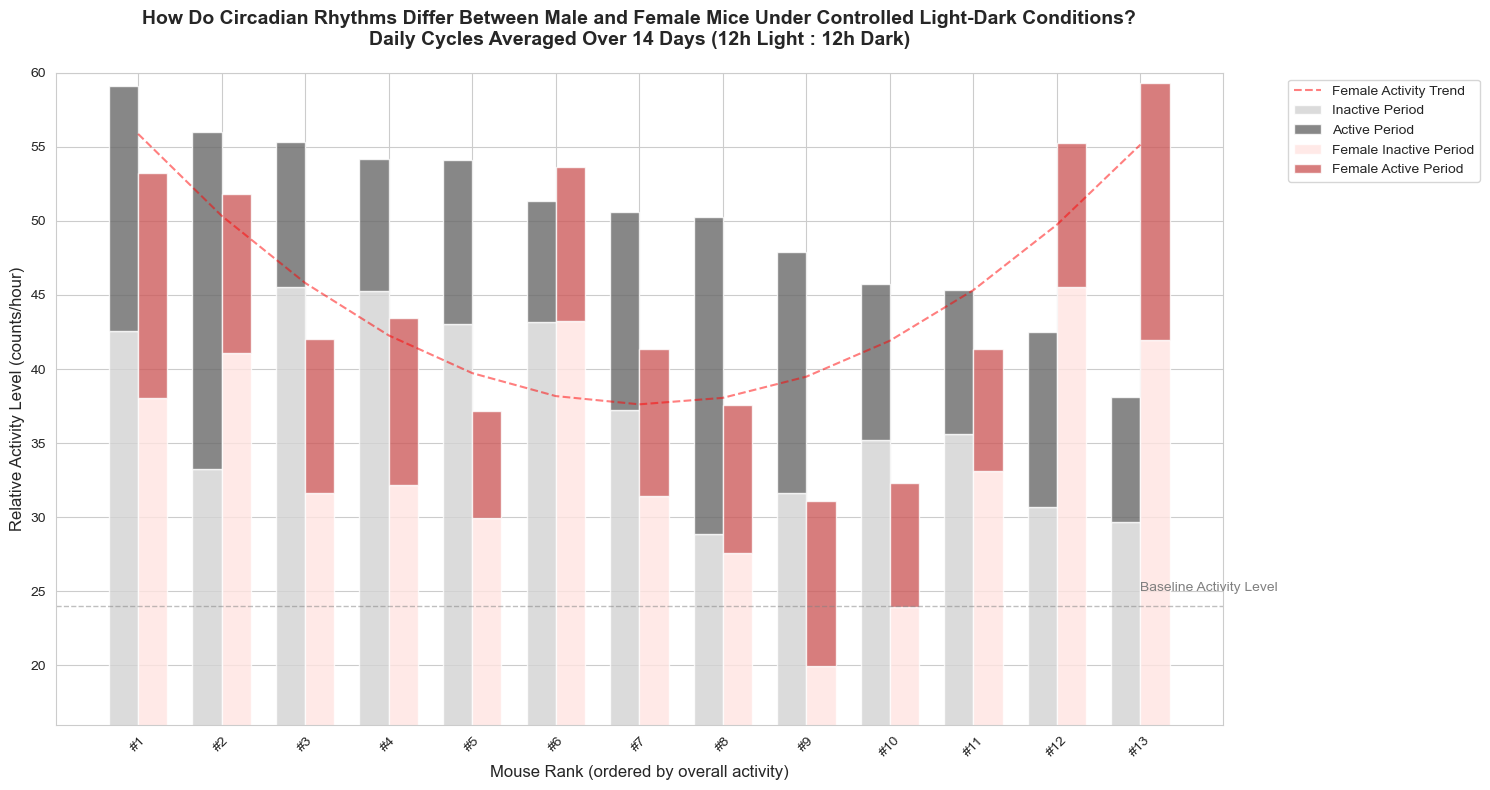

In [15]:
def create_improved_deceptive_plot(fem_act, male_act):
    # Process data with the same function as before
    male_day, male_night, male_day_se, male_night_se = process_activity_data_with_stats(male_act)
    female_day, female_night, female_day_se, female_night_se = process_activity_data_with_stats(fem_act)
    
    # Sort by total male activity
    total_activity_male = male_day + male_night
    sort_idx = np.argsort(total_activity_male)[::-1]
    
    # Apply sorting
    male_day_adj = male_day.iloc[sort_idx]
    male_night_adj = male_night.iloc[sort_idx]
    female_day_adj = female_day.iloc[sort_idx]
    female_night_adj = female_night.iloc[sort_idx]
    
    # Create plot
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")
    
    x = np.arange(len(male_day))
    bar_width = 0.35
    
    # Plot with subtle color differences
    plt.bar(x - bar_width/2, male_day_adj, bar_width,
            label='Inactive Period', color='lightgray', alpha=0.8)
    plt.bar(x - bar_width/2, male_night_adj, bar_width,
            bottom=male_day_adj, label='Active Period', color='dimgray', alpha=0.8)
    
    plt.bar(x + bar_width/2, female_day_adj, bar_width,
            label='Female Inactive Period', color='mistyrose', alpha=0.8)
    plt.bar(x + bar_width/2, female_night_adj, bar_width,
            bottom=female_day_adj, label='Female Active Period', color='indianred', alpha=0.8)
    
    # Add trend lines emphasizing the pattern
    z = np.polyfit(x, female_day_adj + female_night_adj, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.5, label='Female Activity Trend')
    
    # Set deceptive y-axis range
    plt.ylim(16, 60)
    
    # Add reference line with selective annotation
    plt.axhline(y=24, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    plt.text(len(x)-1, 25, 'Baseline Activity Level', fontsize=10, color='gray')
    
    # Improve titles and labels
    plt.title("How Do Circadian Rhythms Differ Between Male and Female Mice Under Controlled Light-Dark Conditions?\n" + 
                "Daily Cycles Averaged Over 14 Days (12h Light : 12h Dark)",
              fontsize=14, weight='bold', pad=20)
    plt.xlabel('Mouse Rank (ordered by overall activity)', fontsize=12)
    plt.ylabel('Relative Activity Level (counts/hour)', fontsize=12)
    
    # Use ranked labels instead of IDs
    plt.xticks(x, [f"#{i+1}" for i in range(len(x))], rotation=45)
    
    # Add selective annotations
    high_activity_idx = 0
    plt.annotate('Peak Activity\nDifference',
                xy=(high_activity_idx, 75),
                xytext=(high_activity_idx+1, 78),
                arrowprops=dict(arrowstyle="->"))
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    
    return plt

# Example usage:
plot = create_improved_deceptive_plot(fem_act, male_act)
plot.savefig("improved_deceptive_plot.png", dpi=300, bbox_inches='tight')
plot.show()

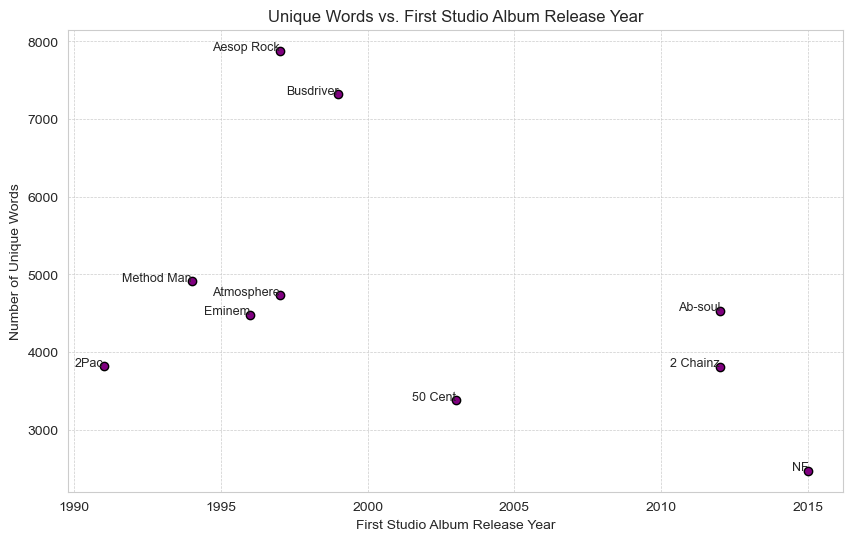

In [16]:
import matplotlib.pyplot as plt

# Data from the dataset
artists = ["Busdriver", "Atmosphere", "Eminem", "Aesop Rock", "NF", "Ab-soul", "2 Chainz", "2Pac", "50 Cent", "Method Man"]
unique_words = [7324, 4730, 4480, 7879, 2472, 4534, 3812, 3815, 3384, 4910]
album_release_year = [1999, 1997, 1996, 1997, 2015, 2012, 2012, 1991, 2003, 1994]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(album_release_year, unique_words, color='purple', edgecolor='black')

# Annotate points with artist names
for i, artist in enumerate(artists):
    plt.text(album_release_year[i], unique_words[i], artist, fontsize=9, ha='right')

# Titles and labels
plt.title("Unique Words vs. First Studio Album Release Year")
plt.xlabel("First Studio Album Release Year")
plt.ylabel("Number of Unique Words")
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.show()


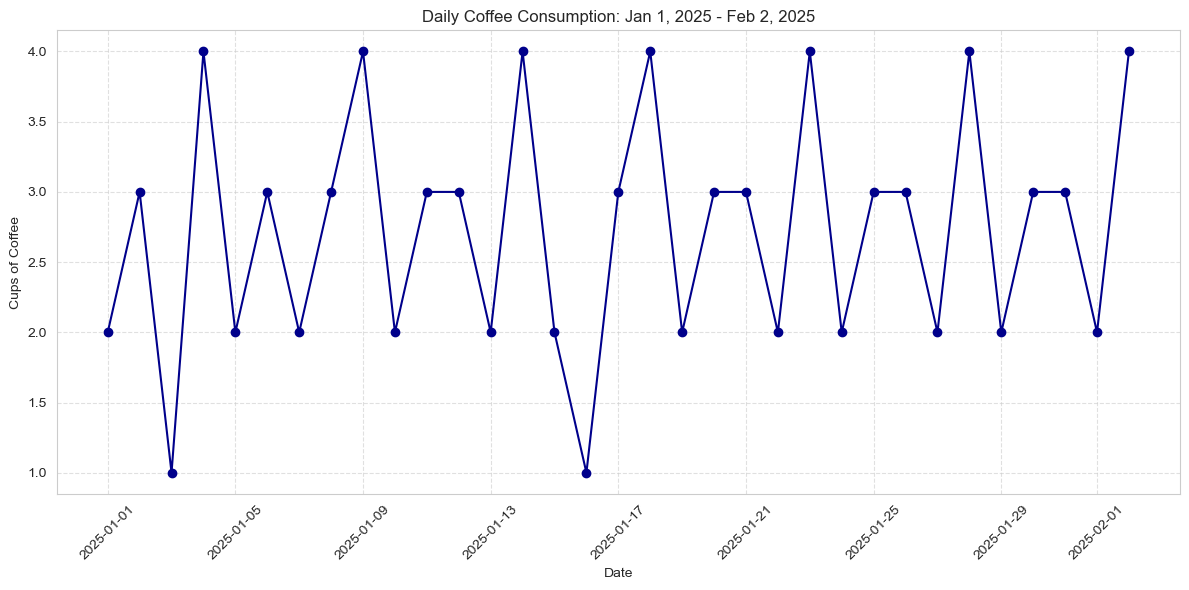

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range from January 1, 2025 to February 2, 2025
date_range = pd.date_range(start="2025-01-01", end="2025-02-02")

# Daily coffee consumption data for 33 days (sample values)
coffee_cups = [2, 3, 1, 4, 2, 3, 2, 3, 4, 2, 3, 3, 2, 4, 2, 1, 3, 4, 2, 3, 3, 2, 4, 2, 3, 3, 2, 4, 2, 3, 3, 2, 4]

plt.figure(figsize=(12, 6))
plt.plot(date_range, coffee_cups, marker='o', linestyle='-', color='darkblue')
plt.title("Daily Coffee Consumption: Jan 1, 2025 - Feb 2, 2025")
plt.xlabel("Date")
plt.ylabel("Cups of Coffee")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
